<a href="https://colab.research.google.com/github/dhruv-s1/Machinelearningmodels/blob/Supervised/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# read csv file
data = pd.read_csv("kc_house_data.csv")
# print first 5 values
print(data.head(5))

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [ ]:
# Check features (columns) in the dataset
features = data.columns
print("Features available in the dataset:")
print(features)

# Check data types of features
data_types = data.dtypes
print("\nData types in the dataset:")
print(data_types)

Features available in the dataset:
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Data types in the dataset:
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


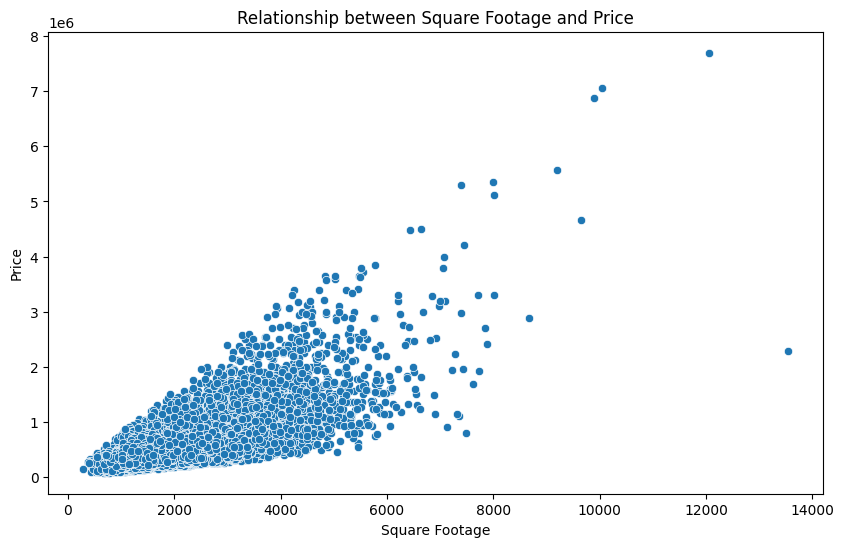

In [ ]:
# Scatter plot for Square Footage vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=data)
plt.title('Relationship between Square Footage and Price')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()


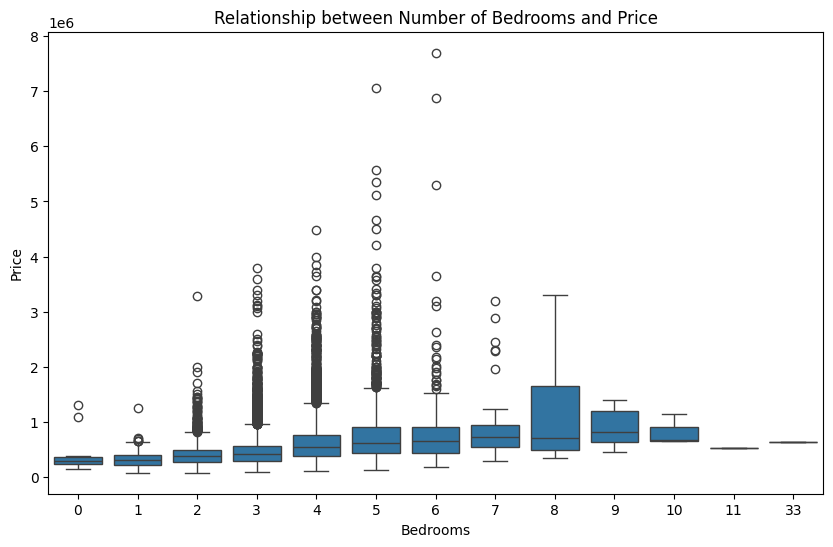

In [ ]:
# Box plot for Bedrooms vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=data)
plt.title('Relationship between Number of Bedrooms and Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()


In [ ]:
# Import necessary modules from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Splitting the data into training and test sets
X = data[['floors', 'bedrooms', 'bathrooms']]  # Features (input variables)
y = data['price']  # Target variable (output)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

Training set size: 15129
Test set size: 6484


In [ ]:

# Print the shape of training and testing sets
print("Training set shape (X_train):", X_train.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Testing set shape (y_test):", y_test.shape)

Training set shape (X_train): (15129, 3)
Training set shape (y_train): (15129,)
Testing set shape (X_test): (6484, 3)
Testing set shape (y_test): (6484,)


In [ ]:

# Create a linear regression object
linear_regression = LinearRegression()

# Fit the linear regression model to the training data
linear_regression.fit(X_train, y_train)

# Make predictions using the test set
y_pred = linear_regression.predict(X_test)

# Evaluate the model using mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 206496.32294971528


In [ ]:
# Print the intercept and coefficients of the linear regression model
print("Intercept (Theta 0):", linear_regression.intercept_)
print("Coefficients (Theta 1, Theta 2, Theta 3):", linear_regression.coef_)

Intercept (Theta 0): -33574.61465447047
Coefficients (Theta 1, Theta 2, Theta 3): [  1056.02051637  24162.6228525  231357.39435324]


In [ ]:

# Example prediction using the trained linear regression model
new_data = [[3, 2, 2]]  # Example input features for prediction: floors=3, bedrooms=2, bathrooms=2

# Make a prediction using the trained model
predicted_price = linear_regression.predict(new_data)

print("Predicted Price:", predicted_price)

Predicted Price: [480633.48130611]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:

import pandas as pd

# Create a DataFrame for actual and predicted price comparison
comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
comparison_df.reset_index(drop=True, inplace=True)  # Reset index for better visualization
print(comparison_df)


      Actual Price  Predicted Price
0         300000.0    619418.780819
1         330000.0    444844.714538
2         675000.0    469535.347648
3         543500.0    643581.403671
4         775000.0    817099.449436
...            ...              ...
6479      825000.0    560523.411714
6480      645000.0    619946.791077
6481      380000.0    792936.826584
6482      300000.0    271326.668773
6483      442500.0    387533.376207

[6484 rows x 2 columns]


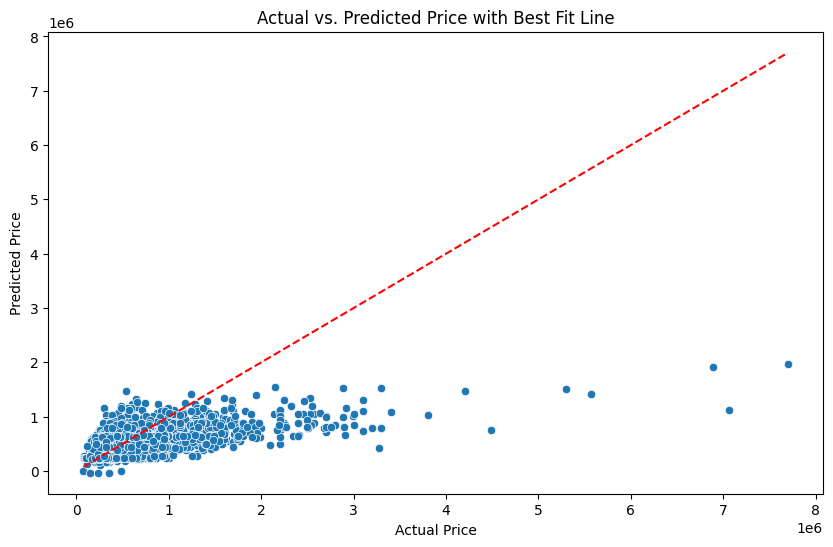

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting actual vs. predicted values with best fit line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Plotting best fit line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price with Best Fit Line')
plt.show()

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 206496.32294971528
Mean Squared Error (MSE): 112255295066.12878
R-squared (R2) Score: 0.2598803405258828
